# Introduction to Strategic Business Analytics

**Loading csv files**

In [1]:
Purchase <- read.csv("data/PASTAPURCHASE_EDITED.csv")
head(Purchase)

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1,1,0.9394443,1,61.71076,25186.8,3
2,1,2,2.5609686,2,61.71076,25186.8,3
3,1,3,0.9011233,0,61.71076,25186.8,3
4,1,4,1.9165300,1,61.71076,25186.8,3
5,1,5,1.5487510,0,61.71076,25186.8,3
6,1,6,2.1694050,0,61.71076,25186.8,3


**Exploring the file**

In [2]:
str(Purchase)

'data.frame':	40000 obs. of  7 variables:
 $ HHID  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TIME  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PASTA : num  0.939 2.561 0.901 1.917 1.549 ...
 $ EXPOS : int  1 2 0 1 0 0 0 0 0 1 ...
 $ AGE   : num  61.7 61.7 61.7 61.7 61.7 ...
 $ INCOME: num  25187 25187 25187 25187 25187 ...
 $ AREA  : int  3 3 3 3 3 3 3 3 3 3 ...


In [3]:
summary(Purchase)

      HHID             TIME           PASTA           EXPOS       
 Min.   :   1.0   Min.   : 1.00   Min.   :0.000   Min.   :0.0000  
 1st Qu.: 500.8   1st Qu.: 5.75   1st Qu.:1.109   1st Qu.:0.0000  
 Median :1000.5   Median :10.50   Median :1.811   Median :0.0000  
 Mean   :1000.5   Mean   :10.50   Mean   :1.842   Mean   :0.4991  
 3rd Qu.:1500.2   3rd Qu.:15.25   3rd Qu.:2.534   3rd Qu.:1.0000  
 Max.   :2000.0   Max.   :20.00   Max.   :6.593   Max.   :5.0000  
      AGE            INCOME              AREA      
 Min.   :18.01   Min.   :   609.1   Min.   :1.000  
 1st Qu.:30.51   1st Qu.: 15379.6   1st Qu.:2.000  
 Median :42.44   Median : 24487.1   Median :3.000  
 Mean   :42.25   Mean   : 27096.1   Mean   :2.996  
 3rd Qu.:54.36   3rd Qu.: 35272.5   3rd Qu.:4.000  
 Max.   :64.98   Max.   :141067.0   Max.   :5.000  

**1) What is the correct mean and standard deviation of the quantity of pasta purchased by time unit by household?**

In [4]:
mean(Purchase$PASTA)

[1] 1.841545

In [5]:
sd(Purchase$PASTA)

[1] 1.025911

**2) In which area are located (i) the poorest household and (ii) the wealthiest household?**

In [6]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
wealth = Purchase  %>% arrange(desc(INCOME)) %>% select(AREA)

In [8]:
head(wealth,1)

,AREA
,<int>
1,5


In [9]:
tail(wealth,1)

,AREA
,<int>
40000,2


**3) What is the maximum pasta quantity a household has bought over the whole time period? (Sum the quantity of pasta by household over time and indicate the maximum)**

In [10]:
# Grouping PASTA according to the HHID values.
# Then we compute the sum for each group.
# Take max value

max(tapply(Purchase$PASTA, Purchase$HHID, sum))

[1] 55.36193

**4) What is the average income of households living in area 4?**

In [11]:
area4 <- Purchase[Purchase$AREA == 4,]
summary(area4$INCOME)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1242   16501   26499   29260   39053  112984 

**5) How many households live in area 2, earn more than 20k, and have purchased more than 30 units of pasta over the whole time period?**

In [12]:
subgroup <- Purchase[Purchase$AREA == 2 & Purchase$INCOME > 20000,]
head(subgroup)

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
181,10,1,1.6903376,0,64.13264,28829.33,2
182,10,2,0.5043048,0,64.13264,28829.33,2
183,10,3,1.9924166,2,64.13264,28829.33,2
184,10,4,3.1279402,1,64.13264,28829.33,2
185,10,5,2.0162208,0,64.13264,28829.33,2
186,10,6,2.3854519,0,64.13264,28829.33,2


In [13]:
suball <- c(tapply(subgroup$PASTA, subgroup$HHID, sum))
summary(suball)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.74   32.66   36.29   36.28   39.73   50.50 

In [14]:
length(suball[c(suball > 30)])

[1] 218

In [15]:
# Direct Way:
household_area2 <- Purchase %>% filter(AREA == 2) %>% filter(INCOME > 20000) %>%
                   group_by(HHID) %>% 
                   summarize( total_qty = sum(PASTA) ) %>% filter(total_qty > 30)

nrow( household_area2 )

`summarise()` ungrouping output (override with `.groups` argument)



[1] 218

**6) What is the correlation between the purchases of pasta and the exposures?**

In [16]:
cor(Purchase$PASTA, Purchase$EXPO)

[1] 0.3266174

**7) Which of the following graphs reports the correct histogram by household of the total purchase of pasta made by the household over the whole period? (Sum the purchases by household and make a histogram.)**

In [17]:
df = Purchase %>% group_by(HHID) %>% summarize(totalPasta = sum(PASTA)) 

`summarise()` ungrouping output (override with `.groups` argument)



In [18]:
library(ggplot2)

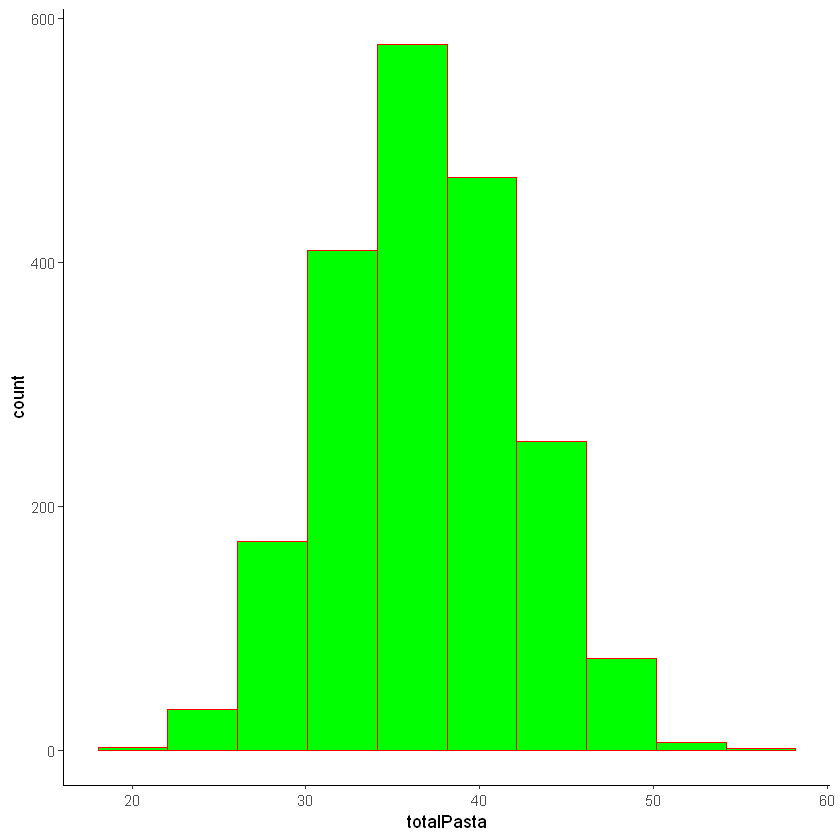

In [19]:
ggplot(df, aes(x=totalPasta)) + geom_histogram(bins=10, fill="green",col="red") + theme_classic()

**8) Which of the following graphs reports the correct time series of the overall total purchase of pasta? (Sum the purchases by time units and plot the quantity by time unit.)**

In [20]:
df2 = Purchase %>% group_by(TIME) %>% summarize(totalPasta = sum(PASTA)) 

`summarise()` ungrouping output (override with `.groups` argument)



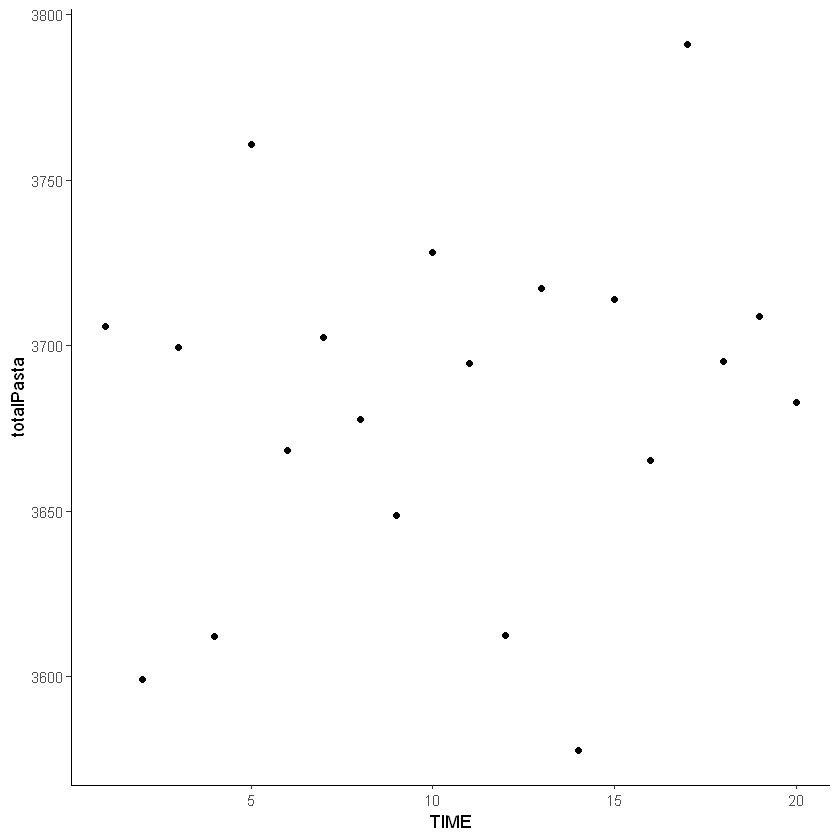

In [21]:
ggplot(df2, aes(x=TIME, y=totalPasta)) + geom_point() + theme_classic()